The challenge is to predict the final sale price of the homes. This information is stored in the SalePrice column.
The value we are trying to predict is target variable.

We followed the steps at below for the Kaggle submission:

Load data <br>
Explore the data <br>
Engineer and transform the features and the target variable <br>
Build a model <br>
Make and submit predictions <br>

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

In [76]:
# train = pd.read_csv('train_clean.csv')
# test = pd.read_csv('test_clean.csv')

-----------------------------------------


In [84]:
sum(test_1.isnull().sum() != 0)

0

In [294]:
# print(train.head())
# print("-----------------------------------------")
# print(test.head())

In [186]:
train = pd.read_csv('~/Desktop/Kaggle/Housing/train.csv')
test = pd.read_csv('~/Desktop/Kaggle/Housing/test.csv')

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [188]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The average sale price of a house in our dataset is 163,000 and most of the values fall in 130,000 to 214,000 price range.

In [323]:
print ("Train data size:", train.shape)
print ("Test data size:", test.shape)


Train data size: (1460, 81)
Test data size: (1459, 80)


# Exploration Stage of Our Project and Engineer Features

We use plotting to explore exploration stage of our project to visualize the distribution of the data,
check for outliers, and see other patterns

In [9]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

Check skewness -measure of the shape of the distribution of values.



Log-transform the target variable since it is skewed. To perform regression of data we need to improve the linearity of data


In [ ]:
# predictions generated by the final model will also be log-transformed. We will convert these predictions back to their original form later.
#np.log() will transform the variable, and np.exp() will reverse the transformation.



Skew : 1.88287575977


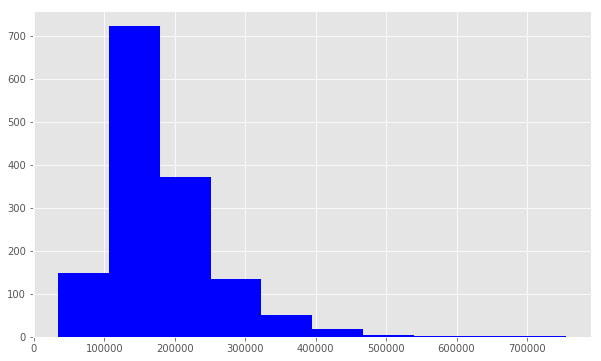

In [190]:
#Distribution has a longer tail on the right. The distribution is positively skewed.
print ("Skew :", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

Skew : 0.121335062205


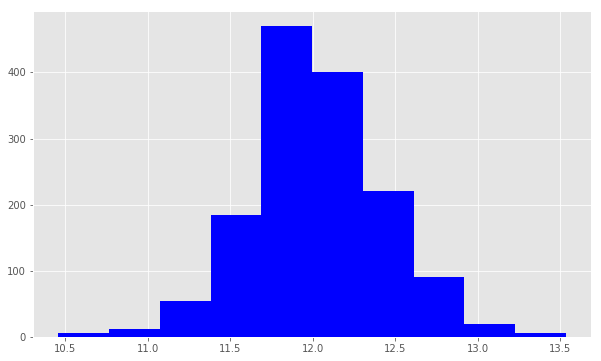

In [191]:
#use np.log() and transform data and check the skewness
target = np.log(train.SalePrice)
print ("Skew :", target.skew())
plt.hist(target, color='blue')
plt.show()
#the image at below more look like a normal distribution


Transformed the target variable and reduce the skewness. Now, we will check numerical features:

# Check Numerical Features

In [192]:
numeric_f = train.select_dtypes(include=[np.number])
numeric_f.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [194]:
#Correlations between the features and the target
corr = numeric_f.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


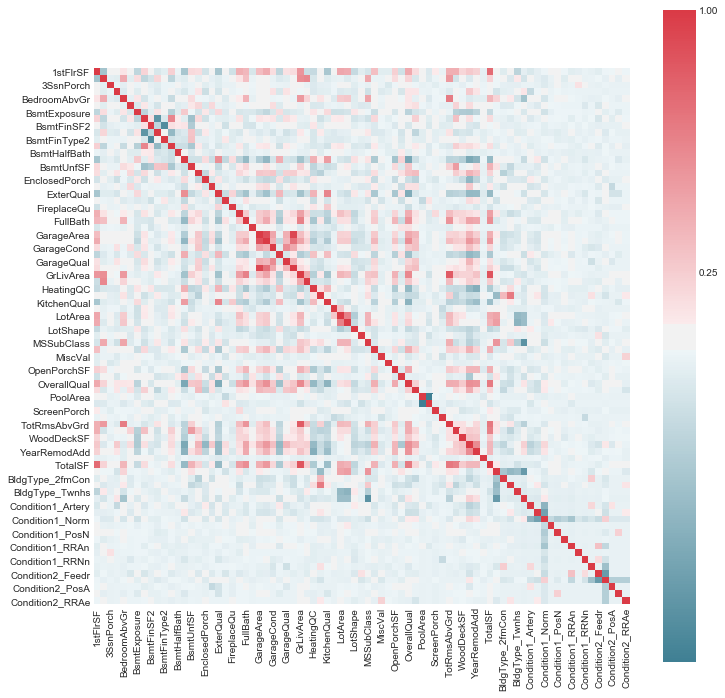

In [301]:
# Generate a custom diverging colormap
mask = np.zeros_like(corr)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr = train.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:80].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1,cmap= cmap, square=True,cbar_kws={"ticks":[0.25,1]}, mask = mask)#annot= True for number label



In [196]:
#Positive Corralated
print (corr['SalePrice'].sort_values(ascending=False)[:10])


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


In [197]:
#Negative Corralated
print (corr['SalePrice'].sort_values(ascending=False)[-10:])

BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [198]:
print (corr['SalePrice'].sort_values(ascending=False)[6:11])

1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [24]:
print (corr['SalePrice'].sort_values(ascending=False)[12:17])

MasVnrArea     0.477493
Fireplaces     0.466929
BsmtFinSF1     0.386420
LotFrontage    0.351799
WoodDeckSF     0.324413
Name: SalePrice, dtype: float64


In [27]:
print (corr['SalePrice'].sort_values(ascending=False)[18:23])

OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
Name: SalePrice, dtype: float64


In [28]:
#First five features are the most positively correlated with SalePrice, 
#while the next five are the most negatively correlated.
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [31]:
#Relationship between OverallQual and SalePrice
overall_quality_piv = train.pivot_table(index='OverallQual',
                                  values='SalePrice', aggfunc=np.median)

In [319]:
overall_quality_piv

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


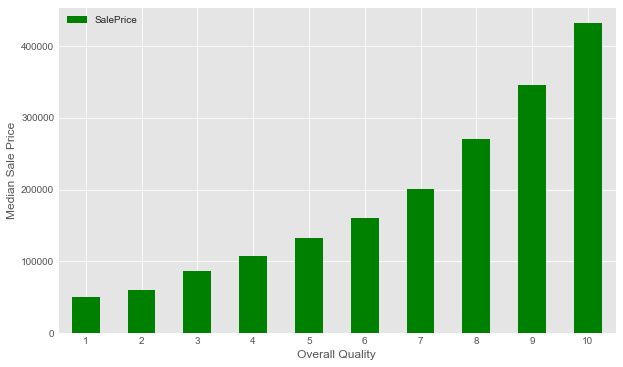

In [320]:
overall_quality_piv.plot(kind='bar', color='green')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

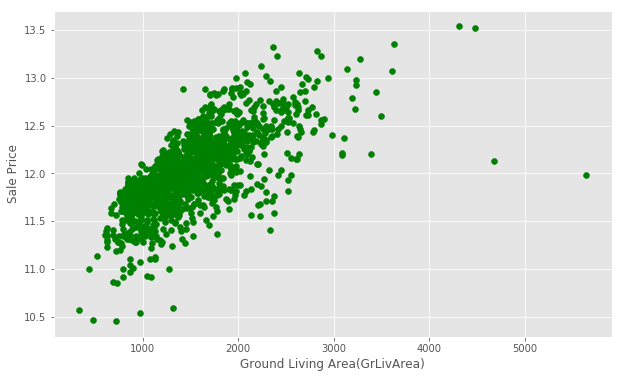

In [200]:
#Ground Living Area GrLivArea and SalePrice
plt.scatter(x=train['GrLivArea'], y=target,  color = 'green')
plt.ylabel('Sale Price')
plt.xlabel('Ground Living Area(GrLivArea)')
plt.show()

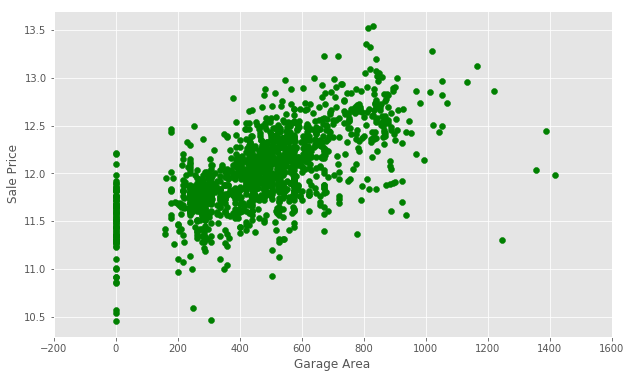

In [201]:
#Garage Area
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice),color = 'green')
plt.xlim(-200,1600) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

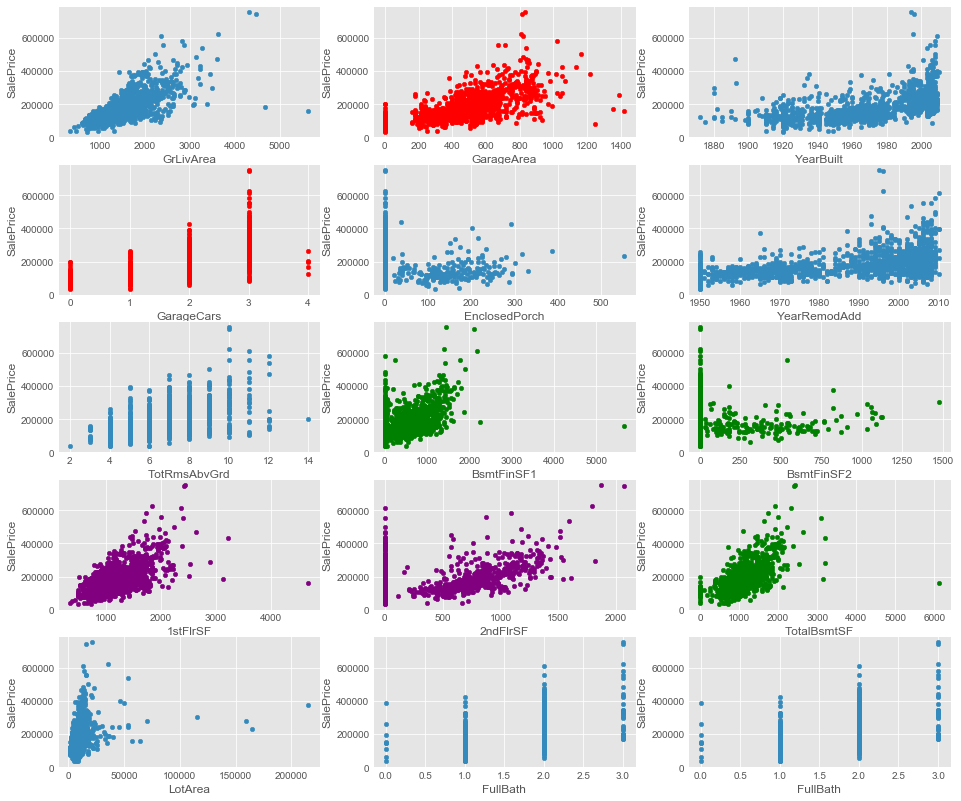

In [329]:
data_train = train

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16, 14))

data_train.plot(ax=axes[0,0], kind='scatter', x='GrLivArea', y='SalePrice')
#Garage
data_train.plot(ax=axes[0,1], kind='scatter', x='GarageArea', y='SalePrice',c ='r')
data_train.plot(ax=axes[1,0], kind='scatter', x='GarageCars', y='SalePrice',c = 'r')

data_train.plot(ax=axes[4,0], kind='scatter', x='LotArea', y='SalePrice')#no obvious linearity
data_train.plot(ax=axes[4,1], kind='scatter', x='FullBath', y='SalePrice')
data_train.plot(ax=axes[0,2], kind='scatter', x='YearBuilt', y='SalePrice')# linear relationship
data_train.plot(ax=axes[1,2], kind='scatter', x='YearRemodAdd', y='SalePrice')# linear relationship

data_train.plot(ax=axes[1,1], kind='scatter', x='EnclosedPorch', y='SalePrice')

data_train.plot(ax=axes[2,0], kind='scatter', x='TotRmsAbvGrd', y='SalePrice')

#basements
data_train.plot(ax=axes[2,1], kind='scatter', x='BsmtFinSF1', y='SalePrice',c ='g')
data_train.plot(ax=axes[2,2], kind='scatter', x='BsmtFinSF2', y='SalePrice',c = 'g')
data_train.plot(ax=axes[3,2], kind='scatter', x='TotalBsmtSF', y='SalePrice',c = 'g')


#floors
data_train.plot(ax=axes[3,0], kind='scatter', x='1stFlrSF', y='SalePrice',c='purple')
data_train.plot(ax=axes[3,1], kind='scatter', x='2ndFlrSF', y='SalePrice',c = 'purple')




#bath
data_train.plot(ax=axes[4,2], kind='scatter', x='FullBath', y='SalePrice')


plt.show()

# Missing values

In [60]:


missing_df = train.isnull().sum().sort_values(ascending=False)[:20]

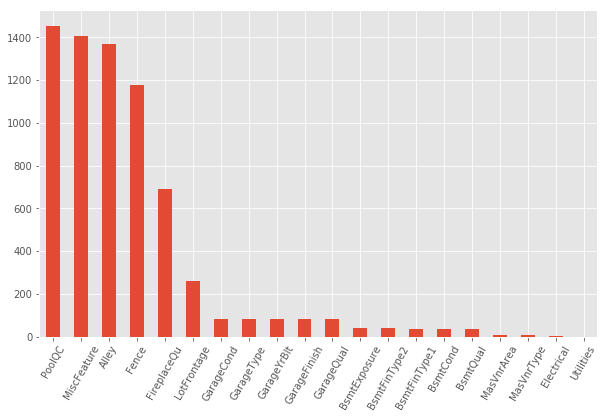

In [61]:
missing_df.plot(kind = 'bar')
plt.xticks(rotation=60)
plt.show()

In [321]:
#Check the missing columns
print(train.MiscFeature.unique())
print(train.PoolQC.unique())

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [ ]:
#Pool quality is nan when PoolArea is 0, or there is no pool.
#similar relationship between many of the Garage-related columns.

# Check non-numeric Features

In [202]:
cat = train.select_dtypes(exclude=[np.number])
cat.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


# Transforming and engineering features

In [64]:
#use One-hot encoding. It is a technique which will transform categorical data into numbers so the model can understand 
#whether or not a particular observation falls into one category or another.
# train['encoded_street'] = pd.get_dummies(train.Street, drop_first=True)
# test['encoded_street'] = pd.get_dummies(train.Street, drop_first=True)

In [67]:
train.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [66]:
print (train.enc_street.value_counts())


1    1454
0       6
Name: enc_street, dtype: int64


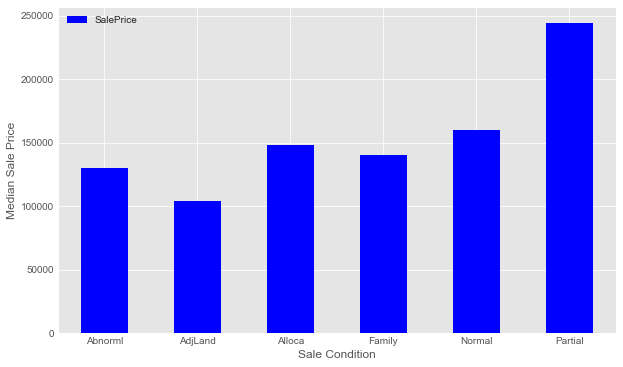

In [322]:
sale_condition_piv = train.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median,)
sale_condition_piv.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0 )
plt.show()

In [78]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

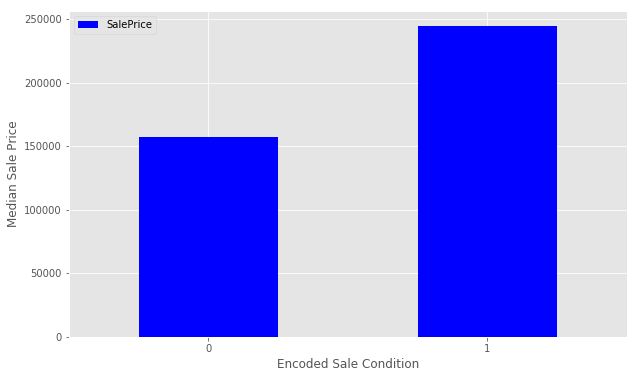

In [79]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [80]:
# data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [82]:
# sum(data.isnull().sum() != 0)

0

In [280]:
train = pd.read_csv('train_clean.csv')

test = pd.read_csv('test_clean.csv')

# Build a Linear Model

In [205]:
train.head()

,Unnamed: 0,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SalesPrice
0,0,11.692623,11.686189,0.0,0.730463,1.540963,1.820334,1.540963,11.170327,0.0,...,0,0,0,0,0,0,0,0,1,12.247699
1,1,12.792276,0.000000,0.0,0.730463,1.540963,1.820334,0.730463,12.062832,0.0,...,0,0,0,0,0,0,0,0,1,12.109016
2,2,11.892039,11.724598,0.0,0.730463,1.540963,1.820334,1.194318,10.200343,0.0,...,0,0,0,0,0,0,0,0,1,12.317171
3,3,12.013683,11.354094,0.0,0.730463,1.540963,0.730463,1.540963,8.274266,0.0,...,0,0,0,0,0,0,0,0,1,11.849405
4,4,12.510588,12.271365,0.0,0.730463,1.820334,1.820334,0.000000,10.971129,0.0,...,0,0,0,0,0,0,0,0,1,12.429220


In [231]:
##Prepare Data for modeling
#prepare our data for modeling. We'll separate the features and the target variable for modeling. 
#We will assign the features to X and the target variable to y. We use np.log() as explained above to transform the y variable for the model. data.drop([features], axis=1) tells pandas which columns we want to exclude. 
#We won't include SalePrice, and Id is just an index with no relationship to SalePrice.

y  = train.SalesPrice#= np.log(train.SalesPrice)
X = train
#X
# y = train_1.drop([ 'Id'], axis=1)
X = train.drop(["SalesPrice"], axis=1)

In [247]:
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalesPrice, dtype: float64

In [248]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)


In [254]:
y_test

1320    12.154785
836     11.512935
413     11.652696
522     11.976666
1035    12.661917
614     11.831386
218     12.649158
1031    12.644331
1288    12.546114
886     11.816734
576     12.010672
1250    12.053801
1190    12.066816
567     12.665398
1107    12.106258
852     11.970357
168     12.119975
1101    11.813037
1118    11.803361
67      12.328295
1041    12.185875
453     12.254868
669     12.063939
1172    12.208575
192     12.165256
123     11.944065
415     12.106998
277     11.856522
433     12.106258
1169    12.049425
          ...    
1033    11.693170
1260    11.766800
901     12.100718
1309    12.220966
566     12.273736
610     11.904974
1058    12.301387
1205    11.580593
1168    13.345509
438     11.411457
939     11.924379
96      12.273736
560     12.043560
1362    11.878631
471     12.154785
1096    12.043560
410     11.002117
962     12.384223
582     12.691584
156     11.603689
594     12.672950
617     12.659737
447     12.205578
1203    11.941462
1066    12

In [255]:
#Begin modelling

from sklearn import linear_model
lr = linear_model.LinearRegression()#instantiate the model

In [256]:
model = lr.fit(X_train, y_train)



In [273]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [257]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.888909923584


In [258]:
#use the model the make predictions
predictions = model.predict(X_test)
predictions

array([ 12.39702052,  11.51437832,  11.549506  ,  12.03389789,
        12.64891563,  11.8539673 ,  12.40137509,  12.67902999,
        12.58317846,  11.84857761,  12.01338178,  12.19927129,
        11.99268067,  12.48172343,  12.03974483,  12.03730906,
        12.16086965,  11.72690871,  11.84202236,  12.29315543,
        12.25555754,  12.21698114,  12.09717822,  12.2734127 ,
        12.22083541,  11.95744846,  12.15888762,  11.62007448,
        12.10865495,  12.145404  ,  11.93386689,  11.64985656,
        12.12881139,  11.63387893,  12.47198216,  12.70949554,
        11.74173336,  12.22428775,  11.6264593 ,  11.60043673,
        11.7222011 ,  12.35055741,  11.64511006,  11.59098611,
        11.77247153,  11.96641723,  11.60723635,  11.77285548,
        11.83272523,  11.95023215,  12.04959313,  11.11685176,
        11.5472405 ,  11.8441682 ,  11.99325748,  12.40124434,
        12.25317609,  12.00151416,  11.78936087,  10.54974503,
        11.28912838,  12.20385771,  12.59554504,  12.43

In [259]:

from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.0174409824746


In [261]:
y_test
predictions

array([ 12.39702052,  11.51437832,  11.549506  ,  12.03389789,
        12.64891563,  11.8539673 ,  12.40137509,  12.67902999,
        12.58317846,  11.84857761,  12.01338178,  12.19927129,
        11.99268067,  12.48172343,  12.03974483,  12.03730906,
        12.16086965,  11.72690871,  11.84202236,  12.29315543,
        12.25555754,  12.21698114,  12.09717822,  12.2734127 ,
        12.22083541,  11.95744846,  12.15888762,  11.62007448,
        12.10865495,  12.145404  ,  11.93386689,  11.64985656,
        12.12881139,  11.63387893,  12.47198216,  12.70949554,
        11.74173336,  12.22428775,  11.6264593 ,  11.60043673,
        11.7222011 ,  12.35055741,  11.64511006,  11.59098611,
        11.77247153,  11.96641723,  11.60723635,  11.77285548,
        11.83272523,  11.95023215,  12.04959313,  11.11685176,
        11.5472405 ,  11.8441682 ,  11.99325748,  12.40124434,
        12.25317609,  12.00151416,  11.78936087,  10.54974503,
        11.28912838,  12.20385771,  12.59554504,  12.43

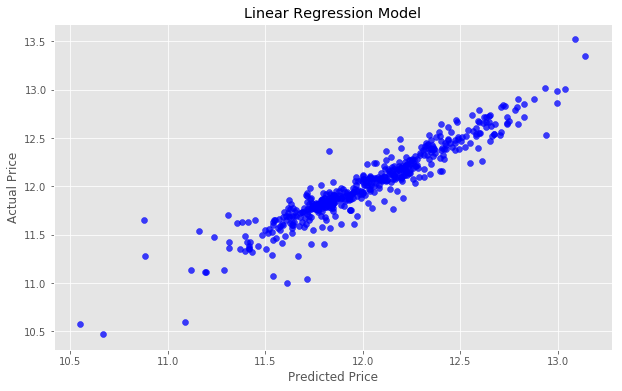

In [262]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

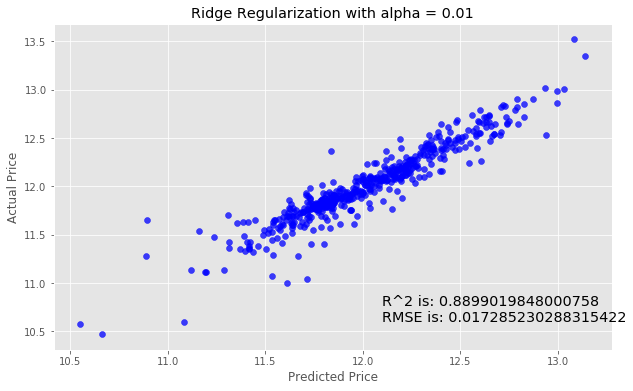

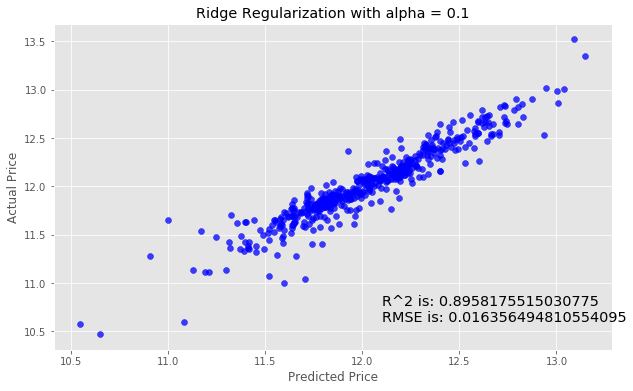

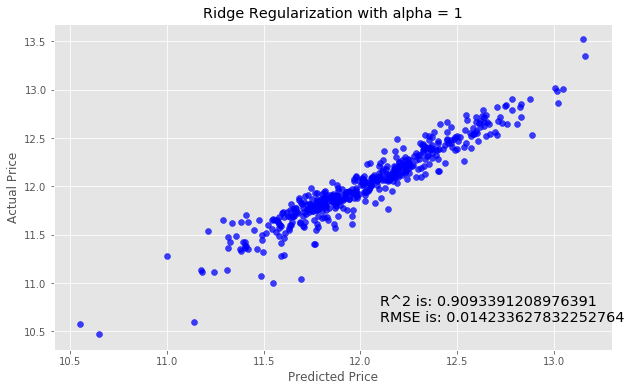

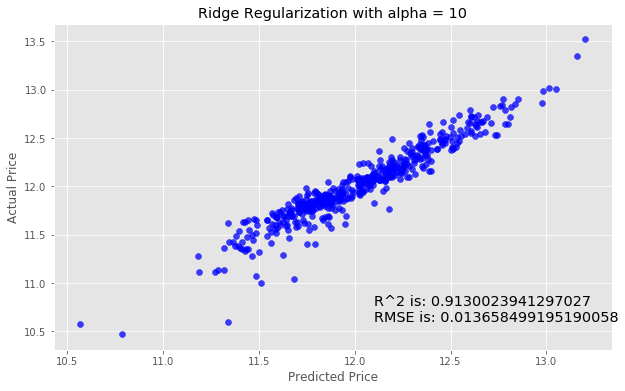

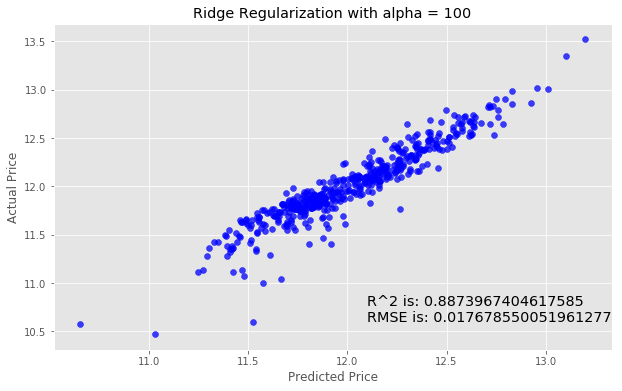

In [263]:
#improve the model
#Ridge Reqularization
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()


In [281]:
kagg_submit = pd.DataFrame()
kagg_submit['Id'] = test.Id

In [282]:
test.head()

,Id,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1458,11.818680,0.000000,0.0,0.730463,1.194318,1.820334,1.540963,10.105326,7.397498,...,0,0,0,0,0,0,0,0,0,1
1,1459,12.943735,0.000000,0.0,0.730463,1.540963,1.820334,1.540963,11.901094,0.000000,...,0,0,0,0,0,0,0,0,0,1
2,1460,11.916131,11.151348,0.0,0.730463,1.540963,1.820334,1.540963,11.476685,0.000000,...,0,0,0,0,0,0,0,0,0,1
3,1461,11.910125,11.062536,0.0,0.730463,1.540963,1.820334,1.540963,10.749651,0.000000,...,0,0,0,0,0,0,0,0,0,1
4,1462,12.833625,0.000000,0.0,0.730463,1.194318,1.820334,1.540963,8.720170,0.000000,...,0,0,0,0,0,0,0,0,0,1


In [283]:
feats = test.select_dtypes(
        include=[np.number])#.interpolate()

In [284]:
feats.head()


,Id,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1458,11.818680,0.000000,0.0,0.730463,1.194318,1.820334,1.540963,10.105326,7.397498,...,0,0,0,0,0,0,0,0,0,1
1,1459,12.943735,0.000000,0.0,0.730463,1.540963,1.820334,1.540963,11.901094,0.000000,...,0,0,0,0,0,0,0,0,0,1
2,1460,11.916131,11.151348,0.0,0.730463,1.540963,1.820334,1.540963,11.476685,0.000000,...,0,0,0,0,0,0,0,0,0,1
3,1461,11.910125,11.062536,0.0,0.730463,1.540963,1.820334,1.540963,10.749651,0.000000,...,0,0,0,0,0,0,0,0,0,1
4,1462,12.833625,0.000000,0.0,0.730463,1.194318,1.820334,1.540963,8.720170,0.000000,...,0,0,0,0,0,0,0,0,0,1


In [285]:
pred = model.predict(feats)
pred

array([ 11.69365817,  11.79138016,  12.13358745, ...,  12.0587538 ,
        11.6769659 ,  12.28223346])

In [286]:
final_pred = np.exp(pred)
final_pred

array([ 119809.48961008,  132108.67495274,  186015.90240748, ...,
        172603.75317181,  117826.19616909,  215827.22054961])

In [277]:
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

Original predictions are: 
 [ 11.69365818  11.79138016  12.13358745  12.16684213  12.18051909] 

Final predictions are: 
 [ 119809.4898839   132108.67503953  186015.90256191  192305.80738605
  194954.03438616]


In [287]:
#Assign these predictions and check 
kagg_submit['SalesPrice'] = final_predictions
kagg_submit.head()

,Id,SalesPrice
0,1458,119809.489884
1,1459,132108.675040
2,1460,186015.902562
3,1461,192305.807386
4,1462,194954.034386


In [291]:
kagg_submit.to_csv('kagg_submit_1.csv', index=False)

In [292]:
train.head()

,Unnamed: 0,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SalesPrice
0,0,11.692623,11.686189,0.0,0.730463,1.540963,1.820334,1.540963,11.170327,0.0,...,0,0,0,0,0,0,0,0,1,12.247699
1,1,12.792276,0.000000,0.0,0.730463,1.540963,1.820334,0.730463,12.062832,0.0,...,0,0,0,0,0,0,0,0,1,12.109016
2,2,11.892039,11.724598,0.0,0.730463,1.540963,1.820334,1.194318,10.200343,0.0,...,0,0,0,0,0,0,0,0,1,12.317171
3,3,12.013683,11.354094,0.0,0.730463,1.540963,0.730463,1.540963,8.274266,0.0,...,0,0,0,0,0,0,0,0,1,11.849405
4,4,12.510588,12.271365,0.0,0.730463,1.820334,1.820334,0.000000,10.971129,0.0,...,0,0,0,0,0,0,0,0,1,12.429220
